# PCA

Principal Component Analysis (PCA) is a powerful statistical technique used in data analysis and machine learning for dimensionality reduction. To illustrate how it works, we'll use the same dataset of cars as before:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from util.cars import draw_car

df = pd.read_excel('util/cars.xlsx')

df

,length,height,type,h,s,v,mileage
0,350,150,sedan,300,0.8,1.0,233587
1,500,180,van,25,0.7,0.7,87915
2,550,200,truck,140,0.1,0.6,59819
3,280,165,sedan,220,0.9,0.2,32682
4,620,230,van,220,1.0,0.5,355894
5,320,155,sedan,0,0.5,0.8,84232
6,730,285,truck,128,0.7,0.5,255416
7,490,170,van,85,0.4,0.4,55188
8,210,155,sedan,5,0.9,0.9,105879
9,460,160,van,90,0.2,0.2,58792


## Principal Components

PCA transforms the original variables into a new set of variables called principal components, which are orthogonal (uncorrelated) and ordered by the amount of variance they capture from the data. Se below how the original variables are now transformed into the same number of components.

In [2]:
# Prepare data for PCA
features = ['length', 'height', 'h', 's', 'v']
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# create a new dataframe with the PCA results
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

df_pca

,PC1,PC2,PC3,PC4,PC5
0,-1.225023,1.905422,0.392236,1.534469,0.089738
1,-0.257908,-0.253965,-0.968487,-0.366931,0.462228
2,0.818771,-1.180891,-0.027421,1.266225,-0.295305
3,-0.392869,0.833568,1.933167,-0.973112,-0.261793
4,1.625062,1.568396,0.039488,-0.319253,0.283121
5,-1.546619,-0.823747,-0.825948,-0.029538,-0.104223
6,2.837447,0.433083,-1.059584,-0.272831,-0.307810
7,0.170920,-1.063066,0.397046,-0.054623,0.263214
8,-2.261459,0.392341,-1.035650,-0.723748,-0.242718
9,0.231680,-1.811141,1.155154,-0.060659,0.113547


The Principal Components are ordered according to the amount of variance that they capture. In general, the variance captures how well they can represent the original dataset. See below the variance captured by each component. The first two components capture almost 70% of the variance.

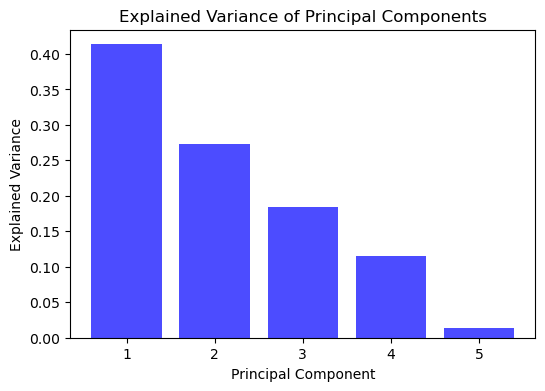

In [3]:
# shows the variance explained by each principal component

explained_variance = pca.explained_variance_ratio_

# plot the explained variance
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(explained_variance)+1), explained_variance, color='blue', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of Principal Components')
plt.show()

## Plotting the data in 2 dimensions

The chart below shows the data using only the two first components. The cars seem to be spread respecting their sizes and colors. That means that if we did a clustering or classification model using only these teo components, we would expect to have reasonable results. PCA minimizes the amount of information lost when reducing the dimensionality.

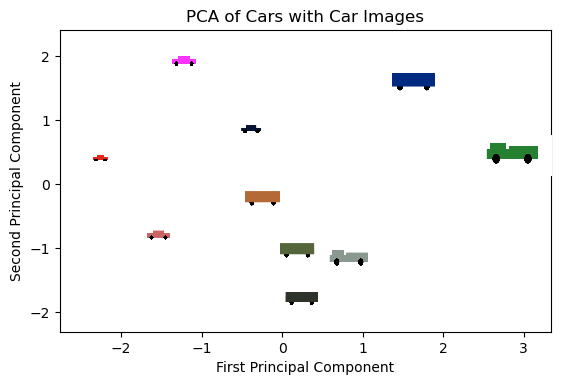

In [4]:
# take the two first principal components from X_pca
X_pca = X_pca[:, :2]

# Create figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# set min, max values for x and y axis according to the PCA results
ax.set_xlim(X_pca[:,0].min()-0.5, X_pca[:,0].max()+0.5)
ax.set_ylim(X_pca[:,1].min()-0.5, X_pca[:,1].max()+0.5)

# Calculate the size range for car images
size = 0.0005
min_length, max_length = df['length'].min(), df['length'].max()
min_size, max_size = size, size*3  # Adjust these values to change the overall size of car images

# Plot cars
for i, (x, y) in enumerate(X_pca):
    car = df.iloc[i]
    car_image = draw_car(car['length'], car['height'], car['type'], car['h'], car['s'], car['v'])
    
    # Calculate size based on car length
    size_factor = (car['length'] - min_length) / (max_length - min_length)
    size = min_size + size_factor * (max_size - min_size)
    
    im = OffsetImage(car_image, zoom=0.0002*car['length'])  # Adjust zoom factor as needed
    ab = AnnotationBbox(im, (x, y), xycoords='data', frameon=False)
    ax.add_artist(ab)

# Set labels and title
ax.set_xlabel(f'First Principal Component')
ax.set_ylabel(f'Second Principal Component')
ax.set_title('PCA of Cars with Car Images')

plt.tight_layout()
plt.show()

## Interpreting the Principal Components

PCA is a linear transformation of the data. Each component has an associated vector representing the loadings (weights) of the transformation according to the original variables. Below we show these vectors for the first two components. The first component has higher weights for the variables length and height, which means that it is capturing aspects of the size of the vehicles. The second components seems to be capturing aspects related to the colors of the vehicles, especially saturation. The same interpretation can be made in the chart above. Cars get bigger from left to right along the first component, while the colors are more saturated closer to the top along the second component.

In [5]:
# shows the loadings of each feature on the first two principal components

loadings = pca.components_[:2].T

# create a dataframe with the loadings
df_loadings = pd.DataFrame(loadings, index=features, columns=['PC1', 'PC2'])

df_loadings

,PC1,PC2
length,0.657115,-0.058619
height,0.626701,0.158631
h,0.201647,0.559551
s,-0.085131,0.750839
v,-0.357122,0.307479
